In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_excel("train(1).xlsx")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [4]:
df=df.drop_duplicates(subset=["id"], keep="first")
df.shape

(16110, 21)

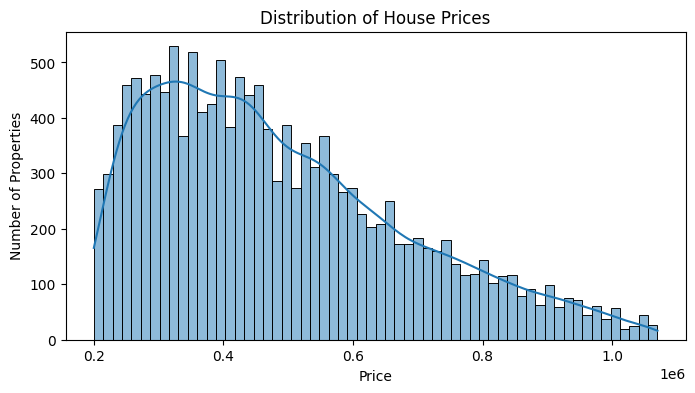

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df["price"], bins=60, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Number of Properties")
plt.show()



In [18]:
upper_limit = df["price"].quantile(0.98)
lower_limit = df["price"].quantile(0.01)

df = df[(df["price"] >= lower_limit) & (df["price"] <= upper_limit)]
df.shape


(14166, 21)

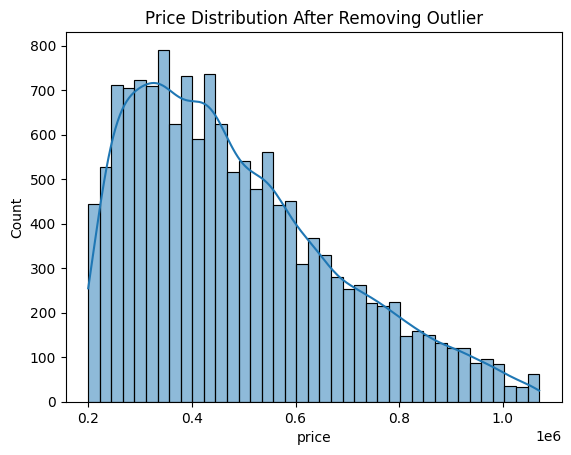

In [14]:
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution After Removing Outlier")
plt.show()


In [15]:
df[["lat","long"]].describe()


,lat,long
count,14599.000000,14599.000000
mean,47.562816,-122.212351
std,0.139551,0.141752
min,47.159300,-122.519000
25%,47.471900,-122.331000
50%,47.573600,-122.228000
75%,47.682400,-122.120000
max,47.777600,-121.352000


In [19]:
df["house_age"] = 2025 - df["yr_built"]
df["renovated_flag"] = (df["yr_renovated"] > 0).astype(int)
df["basement_share"] = (df["sqft_basement"] / df["sqft_living"]).replace(np.inf, 0).fillna(0)
df["neighborhood_density"] = (df["sqft_living"] /df["sqft_living15"])

In [20]:
features = ["bedrooms","bathrooms","sqft_living","sqft_lot","sqft_above","sqft_basement","grade","condition","view","waterfront","lat","long","sqft_living15","sqft_lot15","house_age","renovated_flag","basement_share","neighborhood_density",]
target = "price"
dataset = df[features + [target]].copy()
dataset.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,grade,condition,view,waterfront,lat,long,sqft_living15,sqft_lot15,house_age,renovated_flag,basement_share,neighborhood_density,price
0,4,2.25,1810,9240,1810,0,7,3,0,0,47.4362,-122.187,1660,9240,64,0,0.000000,1.090361,268643
1,3,2.50,1600,2788,1600,0,7,4,0,0,47.4034,-122.187,1720,3605,33,0,0.000000,0.930233,245000
3,2,2.25,1240,705,1150,90,7,3,0,0,47.5321,-122.073,1240,750,16,0,0.072581,1.000000,352499
4,3,2.00,1280,13356,1280,0,7,3,0,0,47.3715,-122.074,1590,8071,31,0,0.000000,0.805031,232000
5,4,3.50,2600,5100,1820,780,8,3,0,0,47.6948,-122.395,2000,6720,22,0,0.300000,1.300000,722500


In [21]:
X = dataset[features]
y = dataset[target]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = 0.20,
    random_state = 42,
    shuffle = True
)

print("Training samples :", X_train.shape[0])
print("Validation samples:", X_val.shape[0])

Training samples : 11332
Validation samples: 2834


In [23]:
X_train.to_csv("processed_X_train.csv", index=False)
X_val.to_csv("processed_X_val.csv", index=False)

y_train.to_csv("processed_y_train.csv", index=False)
y_val.to_csv("processed_y_val.csv", index=False)

print("Preprocessed data exported successfully!")

Preprocessed data exported successfully!


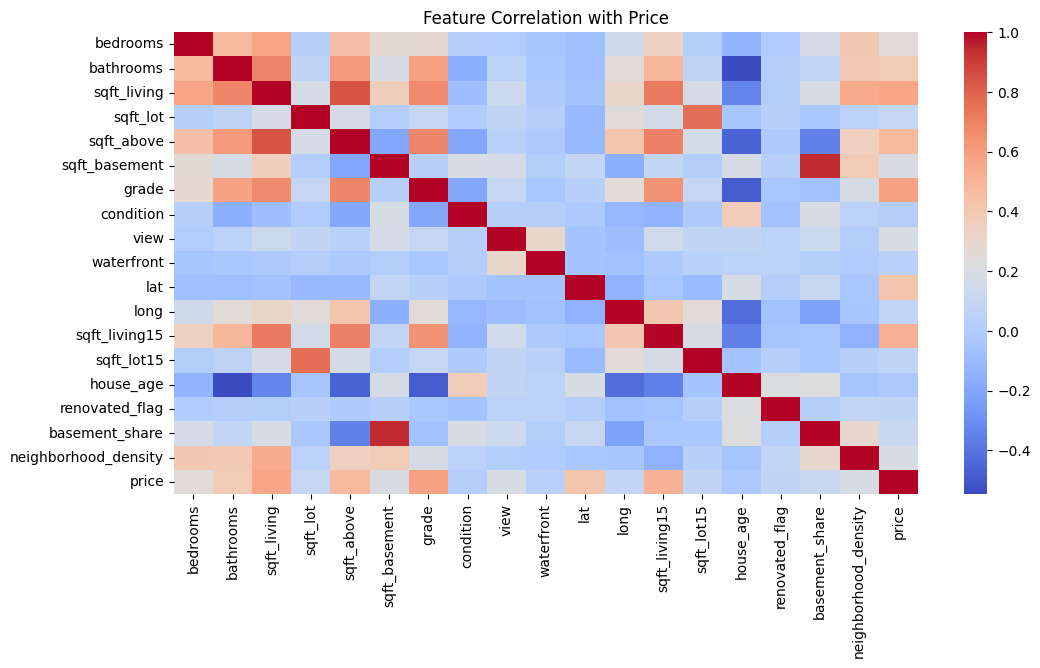

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df[features + ["price"]].corr(), cmap="coolwarm")
plt.title("Feature Correlation with Price")
plt.show()